In [1]:
# Ignoring warning messages

import warnings
warnings.filterwarnings('ignore')

# Import the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
tel_data = pd.read_csv('telecom_churn_data.csv')

In [3]:
tel_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Total number of customers

print("Unique customers in the data: %d"%len(tel_data.mobile_number.unique()))

Unique customers in the data: 99999


In [6]:
# checking the total columns

pd.DataFrame(tel_data.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


##  Data Cleaning

In [7]:
# Null handeling

missing_value = round(100*(tel_data.isnull().sum()/tel_data.shape[0]))
missing_value.sort_values(ascending= False)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
          

In [8]:
# taking the features having more than 50% missing values

len(missing_value.loc[missing_value > 50])

40

In [9]:
# checkinh the columns which have more than 50% of missing values

missing_value.sort_values(ascending= False).head(40)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

**Some of these features are important for analysis. So they must be analysed and we can assign missing values. These features appear to have no values hence assuming values as 0.**

In [10]:
dropCol = ['fb_user','night_pck_user']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in dropCol]:
   tel_data.drop([col],axis =1 ,inplace=True)

In [11]:
# Imputing the missing av_rech_amt_data with 0

imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeCol]:
  tel_data[col].fillna(0, inplace=True)

In [12]:
missing_value = round(100*(tel_data.isnull().sum()/tel_data.shape[0]))
len(missing_value.loc[missing_value > 50])

4

**After the treatment, 4 values/columns are still >50% null, assuming they are not important, and dropping for analysis.**

In [13]:
missing_value.sort_values(ascending=False).head(4)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_9    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_7    74.0
dtype: float64

In [14]:
# Dropping the columns

missing_col = [ 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
tel_data.drop(missing_col, axis = 1,inplace= True)
tel_data.shape

(99999, 214)

In [15]:
# Missing values more than 5%

missing_value = round(100*(tel_data.isnull().sum()/tel_data.shape[0]))
len(missing_value.loc[missing_value > 5])

29

**We have 29 features having more than 5% missing values.**

In [16]:
# Name of these features

missing_value.sort_values(ascending=False).head(29)

loc_og_t2f_mou_9    8.0
std_ic_t2t_mou_9    8.0
offnet_mou_9        8.0
loc_ic_mou_9        8.0
roam_ic_mou_9       8.0
std_og_t2m_mou_9    8.0
roam_og_mou_9       8.0
std_ic_t2o_mou_9    8.0
loc_og_t2t_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2t_mou_9    8.0
spl_og_mou_9        8.0
loc_og_t2m_mou_9    8.0
loc_og_mou_9        8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_mou_9        8.0
loc_og_t2c_mou_9    8.0
onnet_mou_9         8.0
isd_og_mou_9        8.0
isd_ic_mou_9        8.0
spl_ic_mou_9        8.0
ic_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
std_og_mou_9        8.0
std_og_t2c_mou_9    8.0
og_others_9         8.0
loc_ic_t2f_mou_9    8.0
dtype: float64

**These columns are associated with the '_9' i.e. 9th month of data. Determining whether the same customer's data is missing throughout all columns.**

In [17]:
missing_col =['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']
tel_data[tel_data[missing_col].isnull().all(axis=1)][missing_col].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
tel_data[tel_data[missing_col].isnull().all(axis=1)][missing_col]

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Most values are NaN, imputing these values with 0.**

In [19]:
for col in [y for y in missing_col]:
    tel_data[col].fillna(0, inplace=True)

In [20]:
tel_data = tel_data[~tel_data[missing_col].isnull().all(axis=1)]
tel_data.shape

(99999, 214)

In [21]:
# Checking columns having more than 2% of missing values

missing_value = round(100*(tel_data.isnull().sum()/tel_data.shape[0]))
len(missing_value.loc[missing_value > 2])

89

**There are 89 columns having more than 2% missing values.**

In [22]:
missing_value.sort_values(ascending=False).head(89)

og_others_8            5.0
std_ic_t2o_mou_8       5.0
isd_og_mou_8           5.0
loc_og_t2f_mou_8       5.0
ic_others_8            5.0
std_ic_t2f_mou_8       5.0
roam_ic_mou_8          5.0
loc_og_mou_8           5.0
roam_og_mou_8          5.0
std_og_t2t_mou_8       5.0
std_ic_mou_8           5.0
isd_ic_mou_8           5.0
loc_og_t2t_mou_8       5.0
loc_og_t2c_mou_8       5.0
spl_og_mou_8           5.0
loc_og_t2m_mou_8       5.0
std_ic_t2m_mou_8       5.0
offnet_mou_8           5.0
onnet_mou_8            5.0
std_ic_t2t_mou_8       5.0
date_of_last_rech_9    5.0
loc_ic_t2m_mou_8       5.0
loc_ic_t2t_mou_8       5.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_8       5.0
loc_ic_t2f_mou_8       5.0
spl_ic_mou_8           5.0
std_og_t2m_mou_8       5.0
loc_ic_mou_8           5.0
std_og_mou_8           5.0
                      ... 
std_og_t2c_mou_6       4.0
og_others_7            4.0
og_others_6            4.0
std_og_t2c_mou_7       4.0
date_of_last_rech_8    4.0
loc_og_t2t_mou_6       4.0
r

**All these column have more than 4% missing values, checking common rows.**

In [23]:
missing_col = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'date_of_last_rech_8', 'date_of_last_rech_9']
tel_data[tel_data[missing_col].isnull().all(axis=1)][missing_col].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
tel_data[tel_data[missing_col].isnull().all(axis=1)][missing_col]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping these NaN customers from the data.**

In [25]:
tel_data = tel_data[~tel_data[missing_col].isnull().all(axis=1)]
tel_data.shape

(99618, 214)

In [26]:
# For other customers where these missing values are spread out, imputing them with zero. 

missing_col.remove('date_of_last_rech_8')
missing_col.remove('date_of_last_rech_9')
for col in [y for y in missing_col]:
    tel_data[col].fillna(0, inplace=True)

In [27]:
# Missing values

missing_value = round(100*(tel_data.isnull().sum()/tel_data.shape[0]))
len(missing_value.loc[missing_value > 0])

9

**There are still 9 columns having missing values.**

In [28]:
missing_value.sort_values(ascending=False).head(9)

date_of_last_rech_9     4.0
date_of_last_rech_8     3.0
loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_7     1.0
date_of_last_rech_6     1.0
dtype: float64

In [29]:
# checking the values in these columns

col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,tel_data[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [30]:
# Certain of these columns only accept one value. As a result, we can use the mode to impute their missing values in these columns.

col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(tel_data[c].value_counts())
    tel_data[c].fillna(tel_data[c].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [31]:
# Missing values

missing_value = round(100*(tel_data.isnull().sum()/tel_data.shape[0]))
len(missing_value.loc[missing_value > 0])

4

In [32]:
missing_value .sort_values(ascending=False).head(4)

date_of_last_rech_9    4.0
date_of_last_rech_8    3.0
date_of_last_rech_7    1.0
date_of_last_rech_6    1.0
dtype: float64

**The features that display the most recent recharge date have missing values. Since we cannot drop the columns, we can impute it with the last date of that month.**

In [33]:
tel_data['date_of_last_rech_6'].fillna('6/30/2014', inplace = True)
tel_data['date_of_last_rech_7'].fillna('7/31/2014', inplace = True)
tel_data['date_of_last_rech_8'].fillna('8/31/2014', inplace = True)
tel_data['date_of_last_rech_9'].fillna('9/30/2014', inplace = True)

In [34]:
# Missing values

missing_value = round(100*(tel_data.isnull().sum()/tel_data.shape[0]))
len(missing_value.loc[missing_value > 0])

0

In [35]:
# Let's now look for the features having all values as 0

features_as_zero = tel_data.columns[(tel_data == 0).all()]
features_as_zero

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [36]:
# Dropping these columns

tel_data.drop(features_as_zero,axis=1,inplace=True)

### Calculating the percentage of remaining data after Null Treatment

In [37]:
print("Percentage of data remaining after treating missing values: {}%".format(round(tel_data.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(tel_data.shape[0]))
print ("Number of features: {}".format(tel_data.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 203


In [38]:
tel_data.reset_index(inplace=True,drop=True)

In [39]:
# List of all columns that store date

date_columns = list(tel_data.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [40]:
# Converting datatype of date columns to datetime format

for col in date_columns:
    tel_data[col] = pd.to_datetime(tel_data[col], format='%m/%d/%Y')

In [41]:
tel_data['last_date_of_month_6'].unique()

array(['2014-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

**Dropping the unimportant columns.**

In [42]:
tel_data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9',], axis =1, inplace = True)

In [43]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 199 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(160), int64(35)
memory usage: 151.2 MB


In [44]:
tel_data.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=199)

**There are monthly columns with the names (_6,_7,_8,_9), changing the names for homogeniety.**

In [45]:
tel_data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [46]:
# We don't require the complete date, so we can replace it with the Day only

tel_data['date_of_last_rech_6'] = pd.to_datetime(tel_data.date_of_last_rech_6).dt.day
tel_data['date_of_last_rech_7'] = pd.to_datetime(tel_data.date_of_last_rech_7).dt.day
tel_data['date_of_last_rech_8'] = pd.to_datetime(tel_data.date_of_last_rech_8).dt.day

### Filtering data for high-value customers

**Recharging more than 70th percentile of the average recharge amount in the first two months can term the customer as a high-value customer.**

In [47]:
rech_col = tel_data.filter(regex=('count')).columns
tel_data[rech_col].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# For months 6 to 9, we can use the 2G and 3G data combined

for i in range(6,10):
    tel_data['vol_data_mb_'+str(i)] = (tel_data['vol_2g_mb_'+str(i)]+tel_data['vol_3g_mb_'+str(i)]).astype(int)

In [49]:
dropCol = ['vol_2g_mb','vol_3g_mb']
for col in [y + s for s in ['_6','_7','_8',] for y in dropCol]:
   tel_data.drop([col],axis =1 ,inplace=True)

In [50]:
# For month 6 to 9, checking for the average recharge value for every customer for each month

for i in range(6,10):
    tel_data['avg_rech_amt_'+str(i)] = round(tel_data['total_rech_amt_'+str(i)]/tel_data['total_rech_num_'+str(i)]+1,2)

In [51]:
# For month 6 to 9 checking for the total number of data recharge which is (count_rech_2g + count_rech_3g ) for each month

for i in range(6,10):
    tel_data['total_rech_num_data_'+str(i)] = (tel_data['count_rech_2g_'+str(i)]+tel_data['count_rech_3g_'+str(i)]).astype(int)

In [52]:
dropCol = ['count_rech_2g','count_rech_3g']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in dropCol]:
   tel_data.drop([col],axis =1 ,inplace=True)

In [53]:
# For month from 6 to 9, checking for the total amount of data recharge which is (total_rech_num_data * av_rech_amt_data ) for each month.

for i in range(6,10):
    tel_data['total_rech_amt_data_'+str(i)] = tel_data['total_rech_num_data_'+str(i)]*tel_data['av_rech_amt_data_'+str(i)]

In [54]:
# For month from 6 to 9, checking for the total recharge amount which is(total_rech_amt + total_rech_amt_data ) for every customer for each month.

for i in range(6,10):
    tel_data['total_month_rech_'+str(i)] = tel_data['total_rech_amt_'+str(i)]+tel_data['total_rech_amt_data_'+str(i)]
tel_data.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [55]:
# Checking the mean of first two months (good phase)

goodphase_mean =(tel_data.total_month_rech_6 + tel_data.total_month_rech_7)/2

In [56]:
# Looking at the cutoff, which is the 70% of the excellent phase mean recharge amounts

high_val_cutoff= np.percentile(goodphase_mean,70)

In [57]:
# Let's filter the customers whose good phase mean recharge amount >= to the cutoff of 70th percentile.

high_val_cust = tel_data[goodphase_mean >=  high_val_cutoff]
high_val_cust.reset_index(inplace=True,drop=True)

print("No. of High-Value customers: %d\n" % len(high_val_cust))
print("% of High-value customers : {}%".format(round(len(high_val_cust)/tel_data.shape[0]*100),2))

No. of High-Value customers: 29906

% of High-value customers : 30%


### Data(Churn) Handeling

Now naming the churned customers (churn=1, else 0) based on the 4th month:

In the churn phase, checking for the information where we can find who have not made any calls and not utilised data. The attributes required, are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [58]:
churnPhaseMonth = 9
churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
flag = ~high_val_cust[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
flag = flag.map({True:1, False:0})

In [59]:
high_val_cust['churn'] = flag
print("There are {} customers tagged as churners out of {} High-Value Customers.".format(len(high_val_cust[high_val_cust.churn == 1]),high_val_cust.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(high_val_cust[high_val_cust.churn == 1])/high_val_cust.shape[0] *100,2)))


There are 2418 customers tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


- From the above values we can see that there are just **8.09% churn** cases.
- This demonstrates unequivocally that the dataset is **highly imbalanced**, with the non-churners constituting the majority (91.91%) and the churn instances being the minority (8.09%).

In [60]:
# Lets remove all attributes having ‘ _9’, etc. in their names

_9List = high_val_cust.filter(regex=('_9')).columns
high_val_cust.drop(_9List,axis=1,inplace=True)

### Outlier Treatment

In [61]:
high_val_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,2.990600e+04,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,7.001206e+09,109.0,558.806269,561.616785,509.247607,261.171296,268.288923,234.500335,374.178469,378.617878,...,1.671404,1.857453,1.624189,456.901584,529.614264,464.170286,1118.175676,1191.074473,1049.299491,0.080853
std,6.907405e+05,0.0,460.374956,480.202624,502.346776,460.136333,480.586917,458.952539,482.957035,499.398782,...,2.834520,3.095381,2.999321,1420.718202,1478.150374,1625.036120,1568.077084,1634.175261,1806.779214,0.272614
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000026e+09,109.0,1.098500,1.324000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000251e+09,109.0,171.863500,178.390500,84.817000,0.730000,0.585000,0.000000,11.385000,10.635000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,376.000000,383.000000,103.500000,0.000000
25%,7.000609e+09,109.0,310.568500,310.641000,231.802000,17.160000,16.045000,10.510000,71.730000,70.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,547.000000,552.000000,396.000000,0.000000
50%,7.001203e+09,109.0,482.619000,481.813000,427.616000,84.780000,82.890000,65.730000,222.860000,220.300000,...,1.000000,1.000000,1.000000,92.000000,101.000000,25.000000,789.000000,815.000000,690.000000,0.000000
75%,7.001803e+09,109.0,700.290750,699.132750,662.286750,290.895000,290.755000,240.710000,488.307500,494.437500,...,2.000000,2.000000,2.000000,400.000000,575.000000,308.000000,1210.000000,1271.000000,1154.000000,0.000000
90%,7.002165e+09,109.0,994.248000,996.535000,978.198000,755.860000,785.320000,666.740000,897.260000,917.595000,...,5.000000,5.000000,5.000000,1128.000000,1374.000000,1088.000000,2015.000000,2182.000000,2040.000000,0.000000


**We have outliers present below 0.01 and above 0.99 percentile range.**

In [62]:
cont_cols = [col for col in high_val_cust.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    percentiles = high_val_cust[col].quantile([0.01,0.99]).values
    high_val_cust[col][tel_data[col] <= percentiles[0]] = percentiles[0]
    high_val_cust[col][tel_data[col] >= percentiles[1]] = percentiles[1]

In [63]:
high_val_cust.shape

(29906, 154)

### Analysing the Correlation

 - To handle multicollinearity PCA for feature selection in our initial model.
 - We will use PCA and Random Forest to overcome the multicoliniarity in the second model.

In [64]:
high_val_cust['int_usage_median'] = high_val_cust[['vol_data_mb_6','vol_data_mb_7','vol_data_mb_8']].median(axis=1)
high_val_cust['int_usage_median'] = high_val_cust.int_usage_median.map(lambda x: 1 if x == 0 else 0)

high_val_cust['tenure_buck'] = np.round(high_val_cust['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
high_val_cust['tenure_buck'] = pd.cut(high_val_cust['tenure_buck'], bins)
high_val_cust['tenure_buck'].value_counts()

(4, 10]    9115
(1, 2]     7595
(0, 1]     5927
(2, 3]     4381
(3, 4]     2825
Name: tenure_buck, dtype: int64

In [65]:
# Some of the features have almost zero variance. Let's drop them.

high_val_cust = high_val_cust.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon',
                                'circle_id',], 1)

In [66]:
high_val_cust.shape

(29906, 149)

In [67]:
missing_value = round(100*(high_val_cust.isnull().sum()/high_val_cust.shape[0]))
len(missing_value.loc[missing_value > 0])

1

In [68]:
missing_value.sort_values(ascending=False).head(4)

avg_rech_amt_8    2.0
tenure_buck       0.0
spl_og_mou_6      0.0
total_og_mou_8    0.0
dtype: float64

**Here a derived feature has 2% of its values missing. Because it is impractical to impute the missing value in a derived column, we can drop the row.**

In [69]:
high_val_cust.dropna(axis = 0, how = 'any', inplace = True)

In [70]:
missing_value = round(100*(high_val_cust.isnull().sum()/high_val_cust.shape[0]))
len(missing_value.loc[missing_value > 0])

0

In [71]:
high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 149 entries, mobile_number to tenure_buck
dtypes: category(1), float64(117), int32(3), int64(28)
memory usage: 32.9 MB


[Text(0, 0.5, '(%)')]

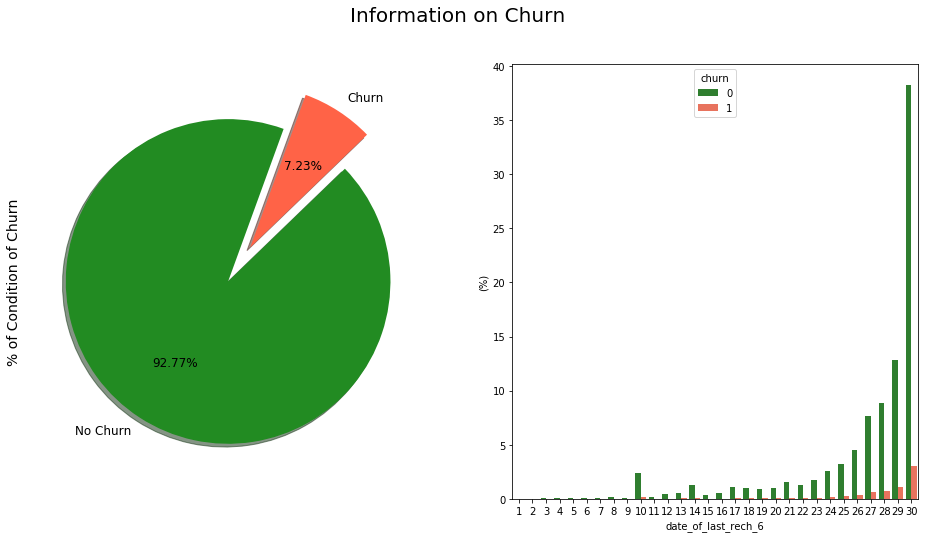

In [72]:
f, ax = plt.subplots(1,2, figsize = (16,8))
colors = ["#228B22", "#FF6347"]

labels = "No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)
high_val_cust["churn"].value_counts().plot.pie(explode=[0,0.25], autopct = '%1.2f%%', ax = ax[0], shadow = True, colors = colors, 
                                             labels = labels, fontsize = 12, startangle = 70)
ax[0].set_ylabel('% of Condition of Churn', fontsize = 14)
palette = ["#228B22", "#FF6347"]
sns.barplot(x = "date_of_last_rech_6", y = "churn", hue = "churn", data = high_val_cust, palette = palette, estimator = lambda x: len(x) / len(high_val_cust) * 100)
ax[1].set(ylabel = "(%)")

 - The ratio of "potential churn customers" to "non-churn customers" is depicted in the above graph.
 - Furthermore, the last few days of the month have the biggest impact.

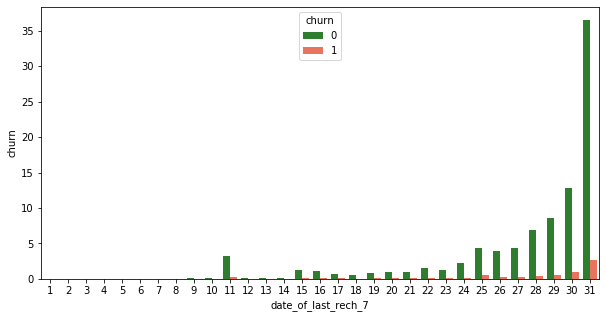

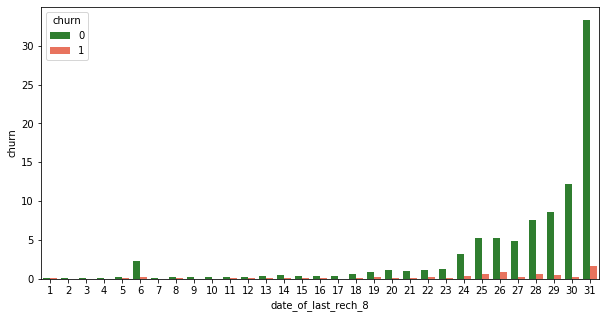

In [73]:
plt.figure(figsize = (10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x = "date_of_last_rech_7", y = "churn", hue="churn", data = high_val_cust, palette = palette, 
            estimator = lambda x: len(x) / len(high_val_cust) * 100)

plt.figure(figsize = (10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x = "date_of_last_rech_8", y = "churn", hue = "churn", data = high_val_cust, palette = palette, 
            estimator = lambda x: len(x) / len(high_val_cust) * 100)

**As per the two graphs above, the majority of recharges for the seventh and eighth months are made in the final days of the month.**

In [74]:
high_val_cust.shape

(29238, 149)

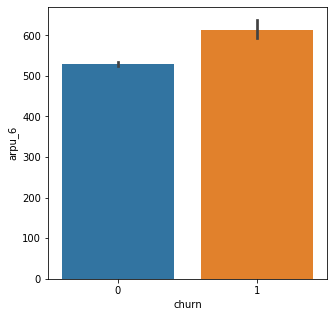

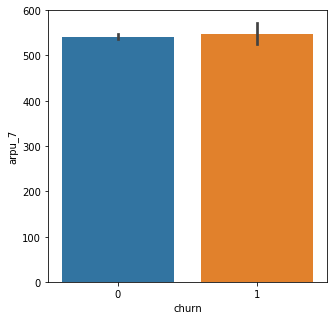

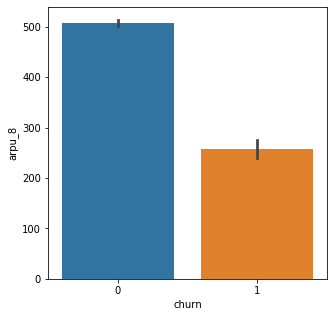

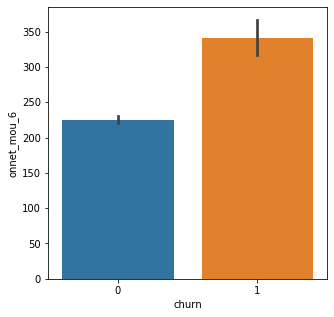

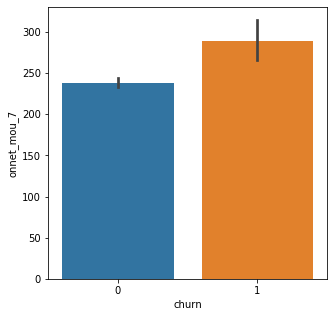

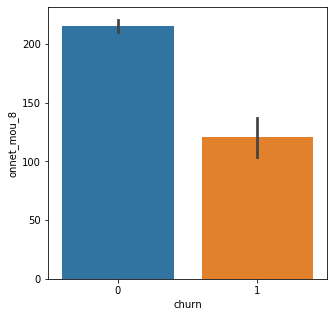

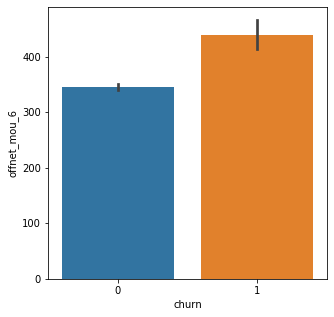

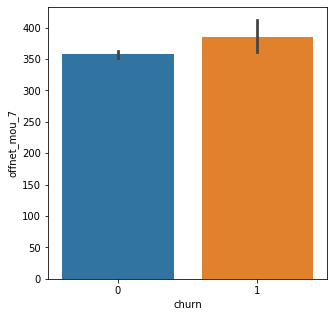

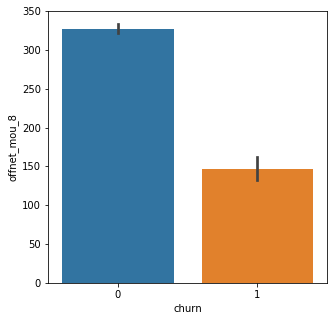

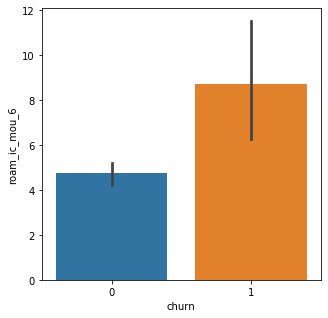

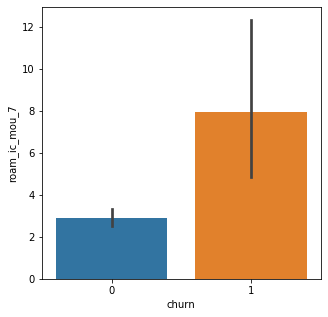

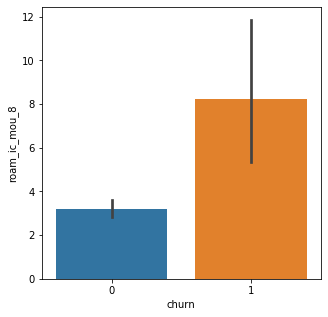

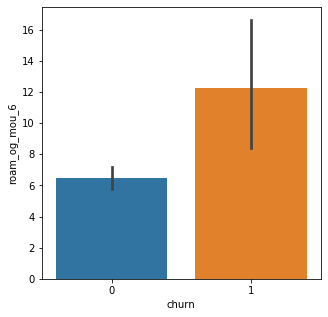

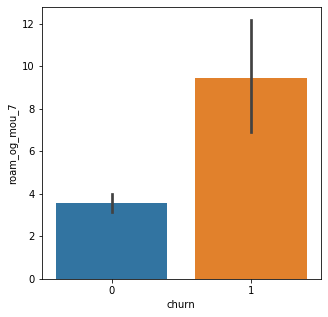

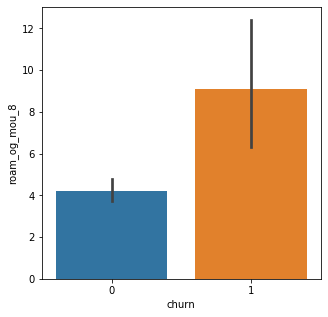

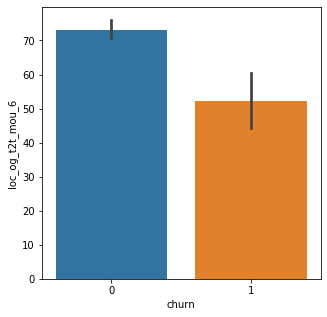

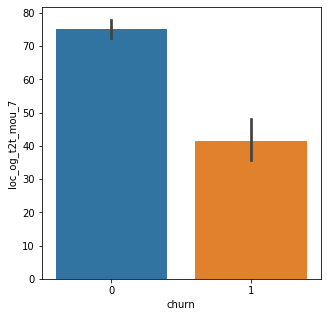

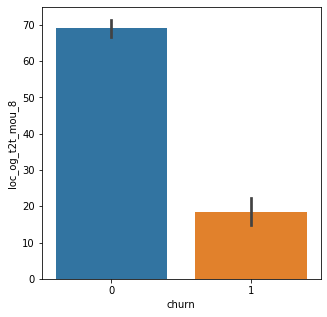

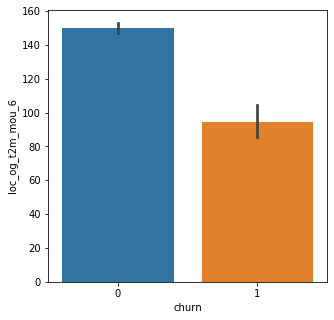

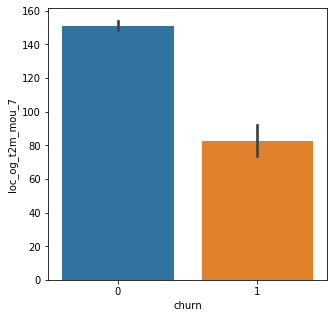

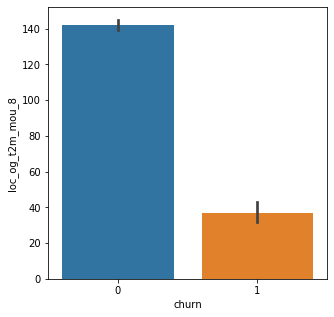

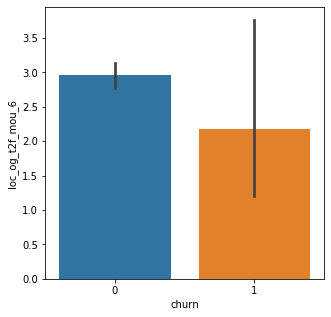

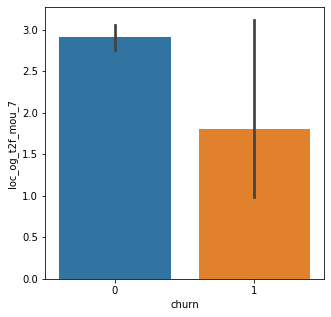

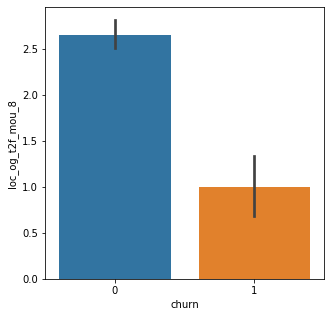

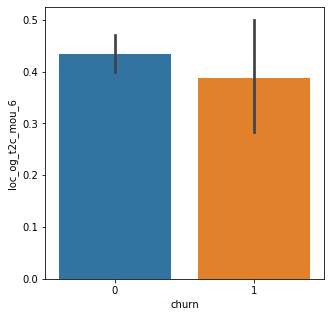

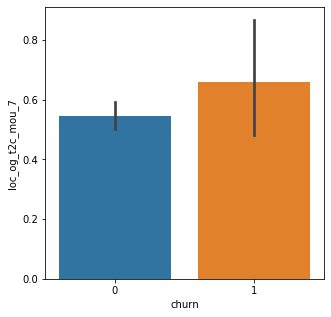

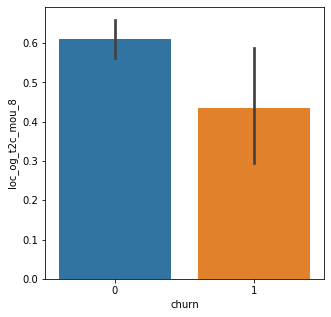

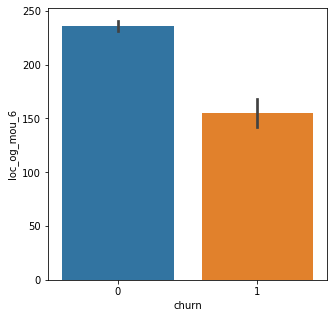

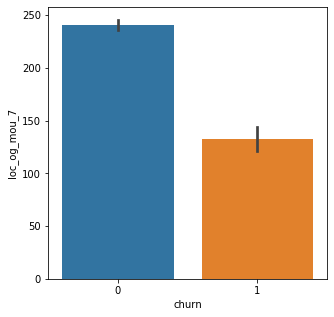

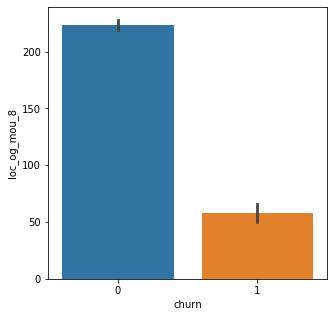

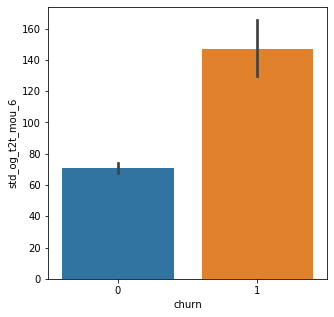

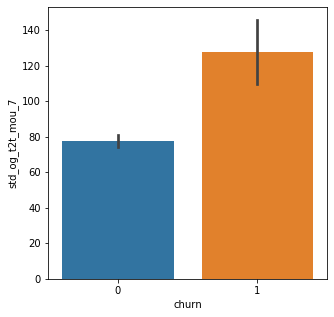

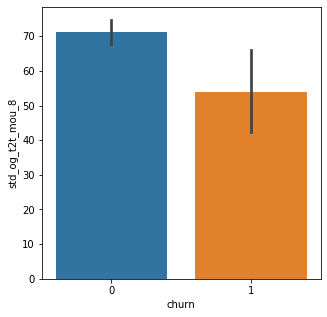

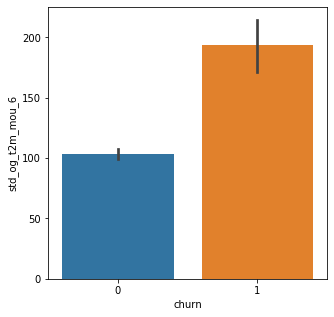

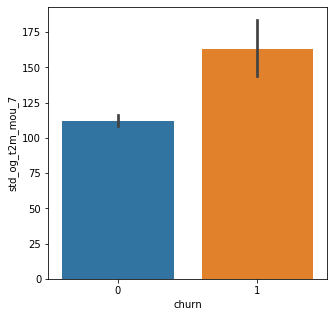

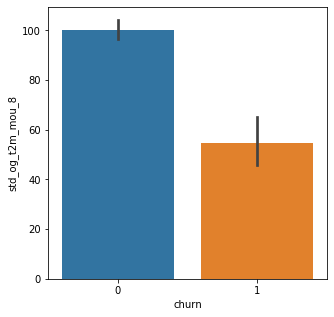

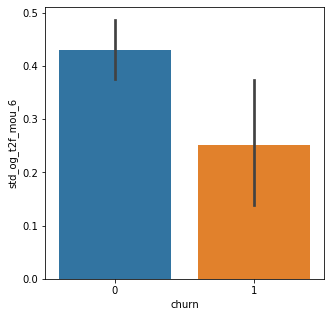

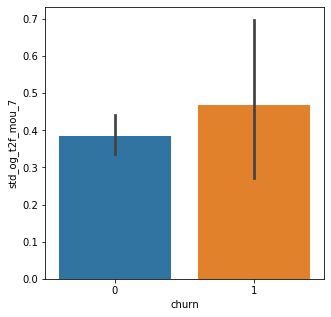

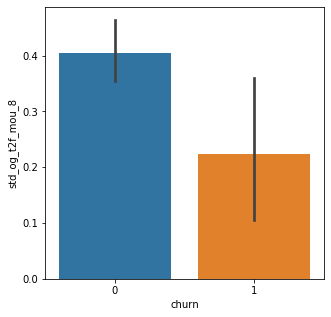

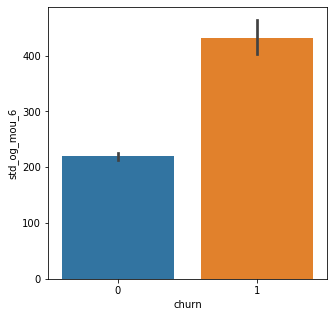

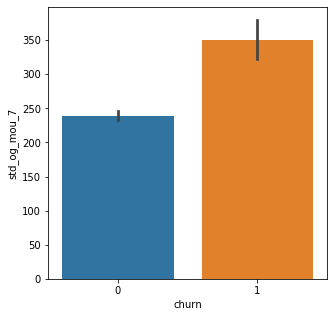

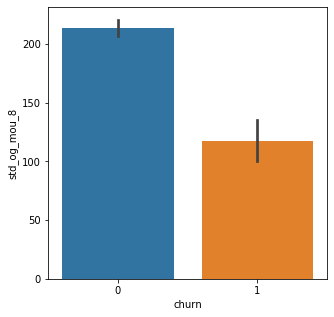

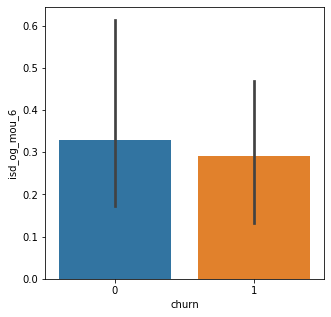

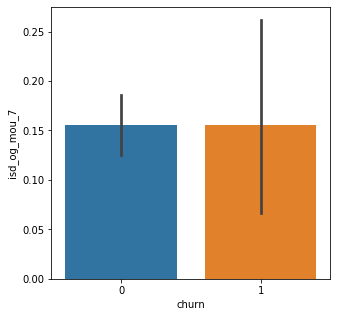

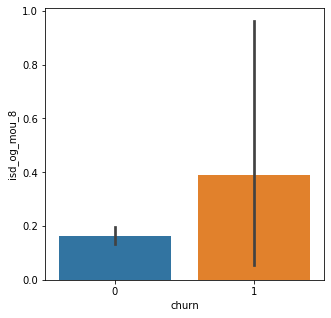

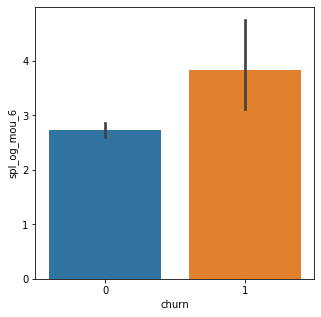

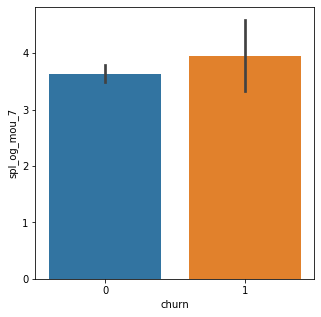

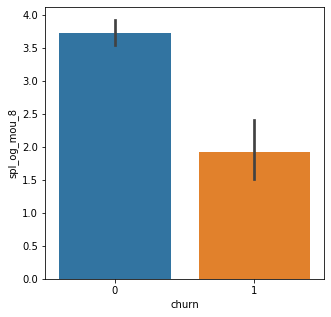

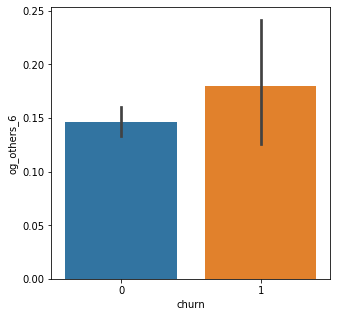

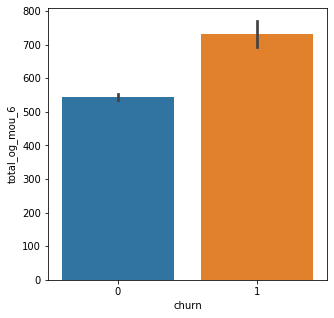

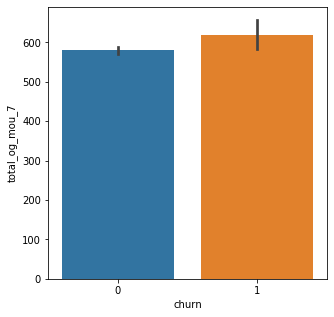

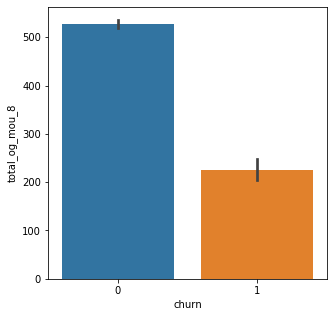

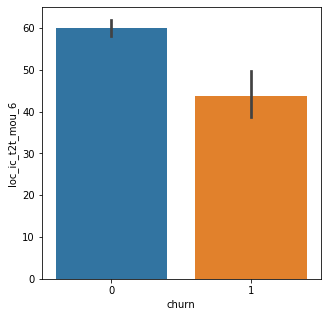

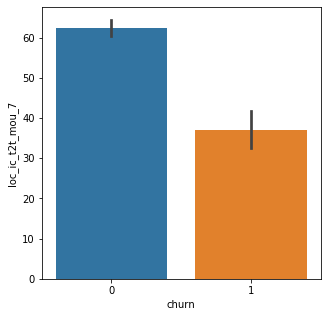

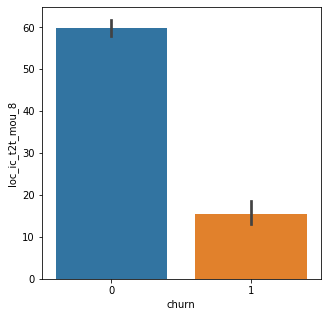

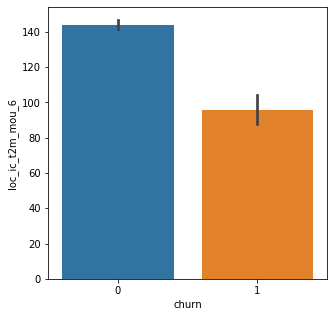

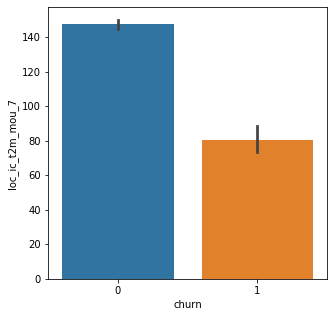

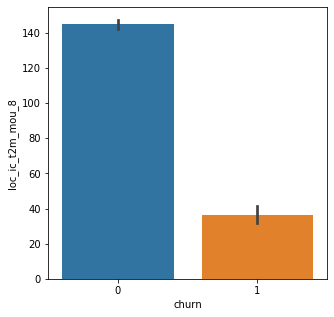

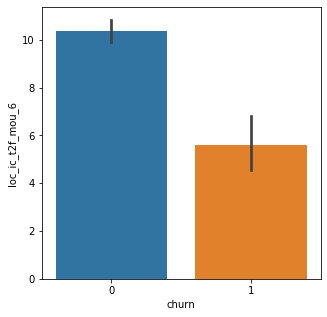

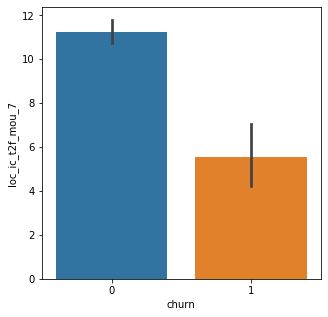

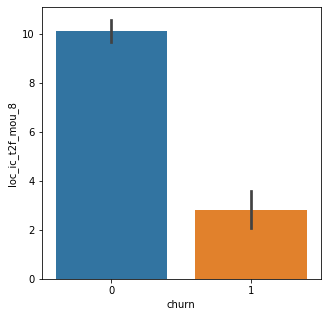

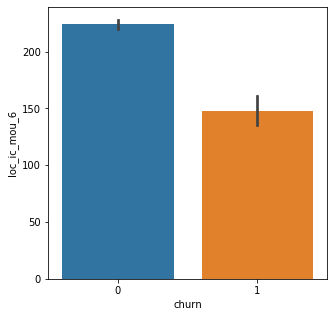

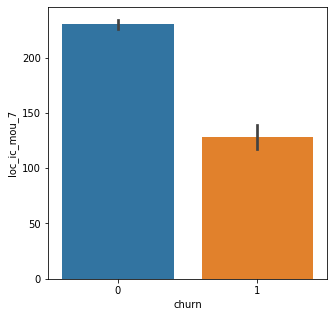

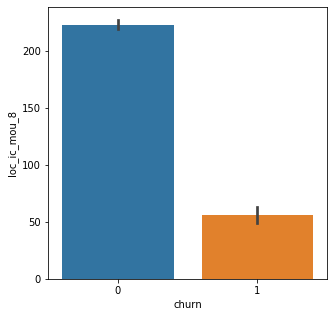

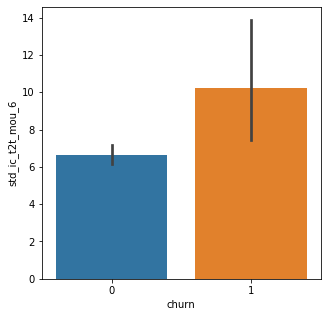

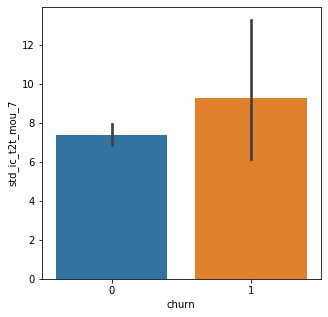

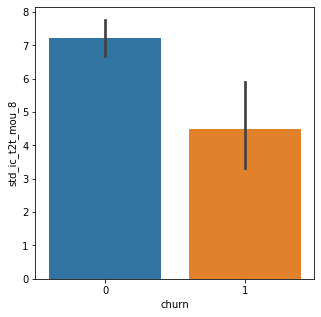

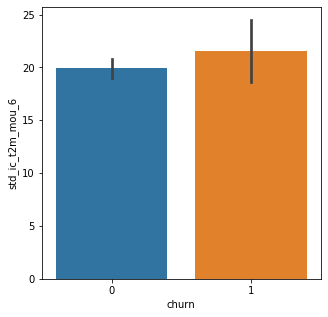

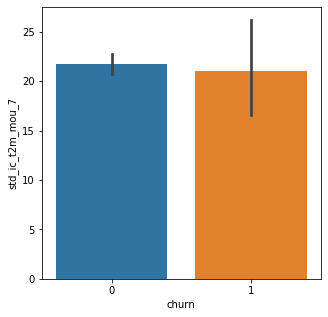

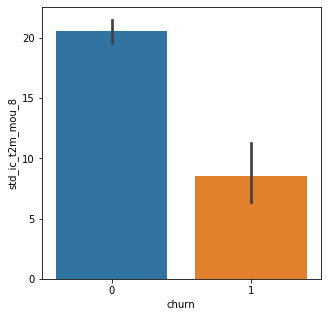

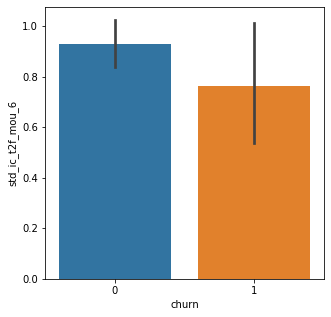

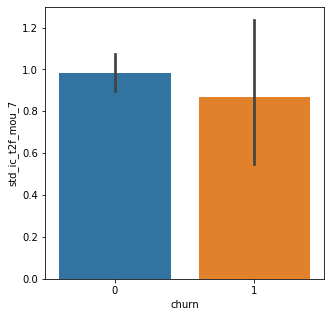

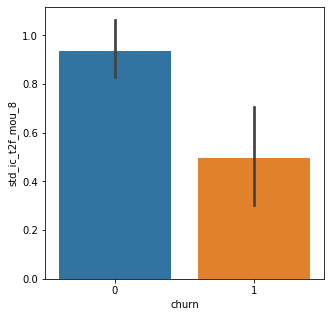

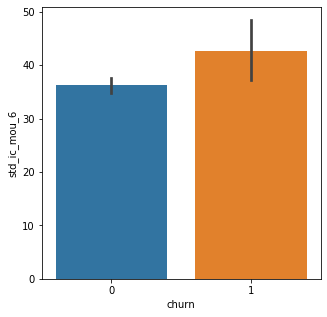

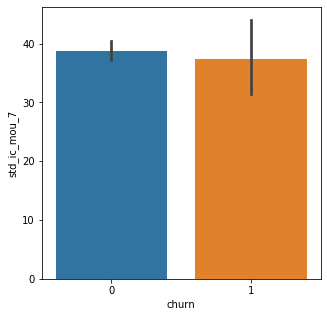

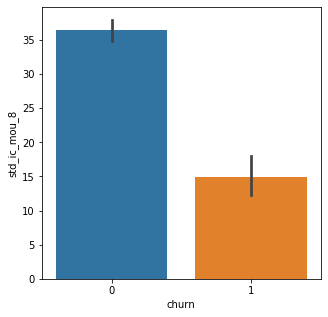

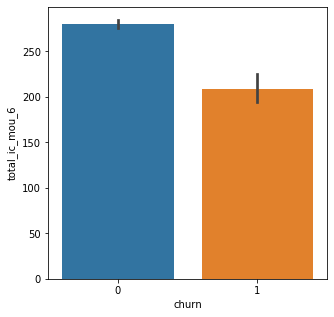

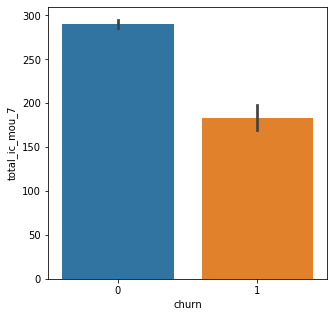

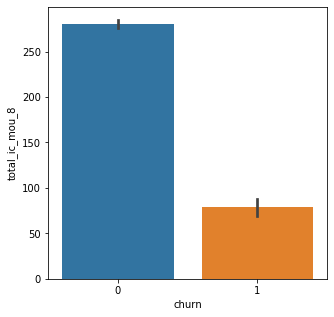

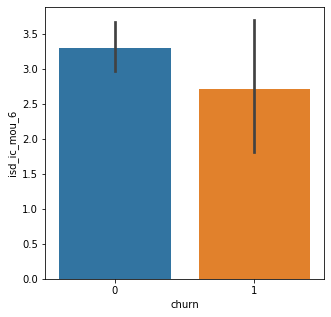

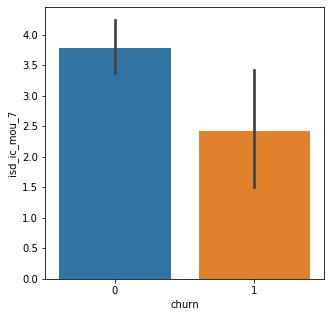

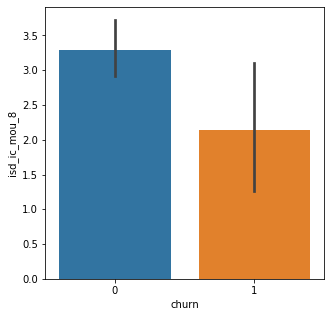

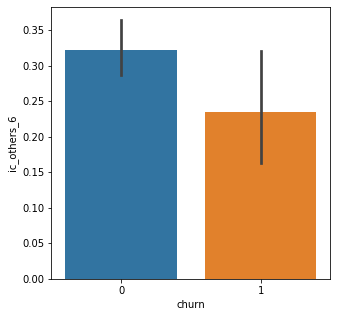

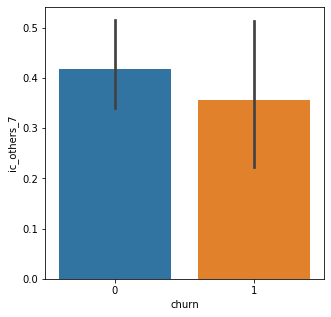

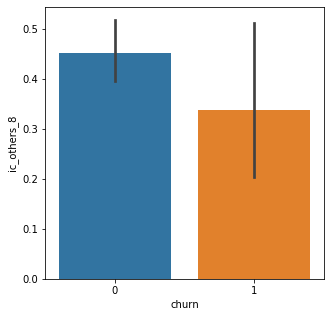

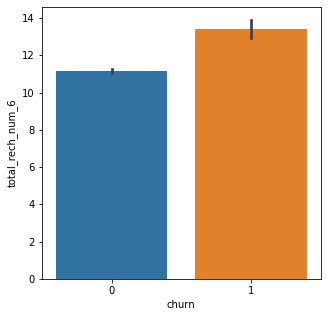

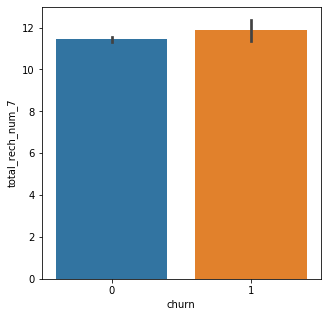

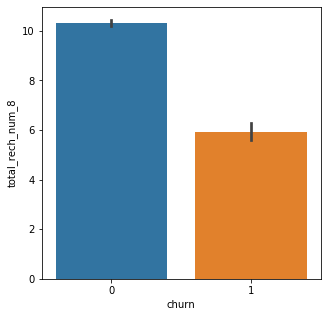

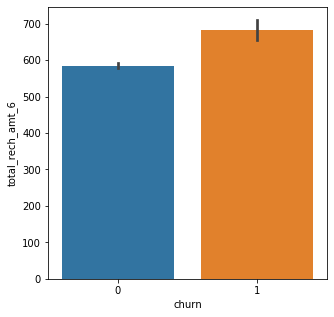

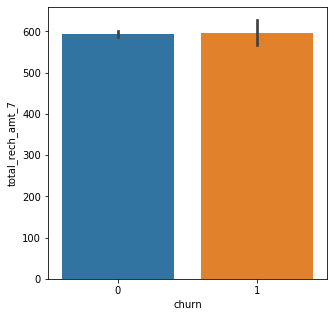

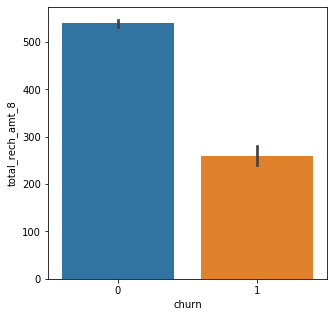

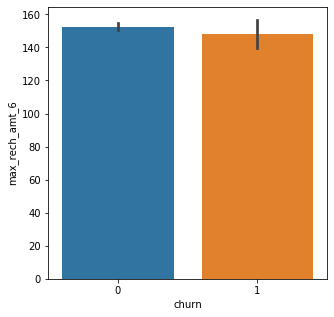

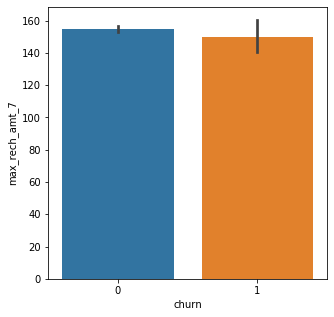

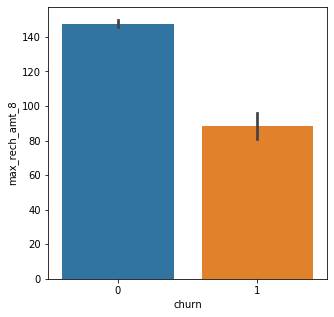

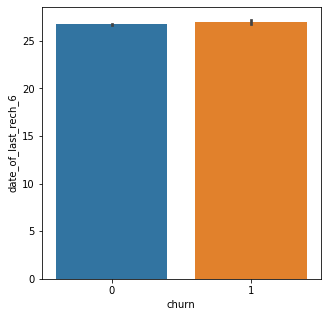

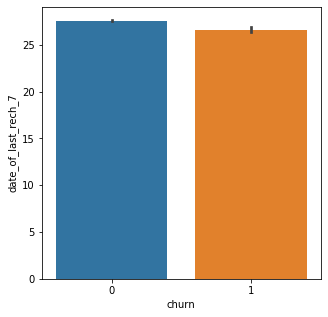

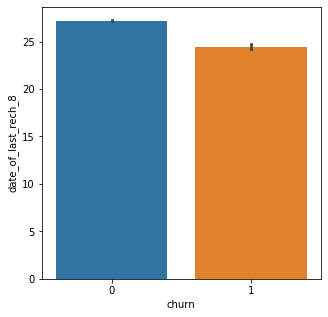

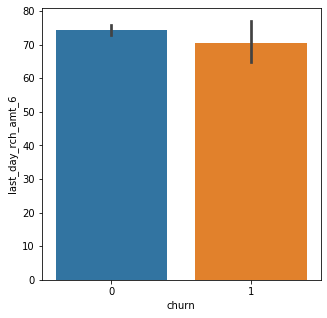

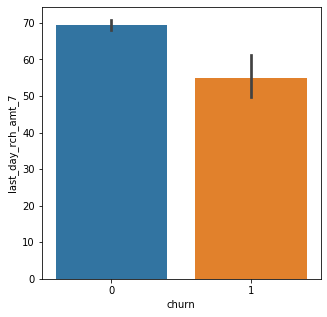

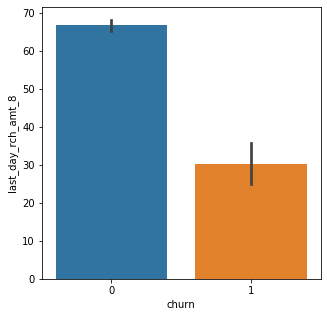

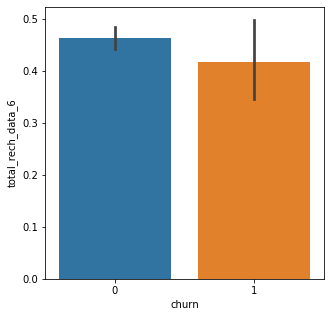

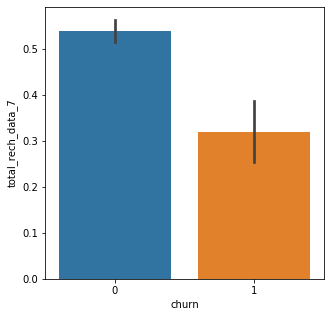

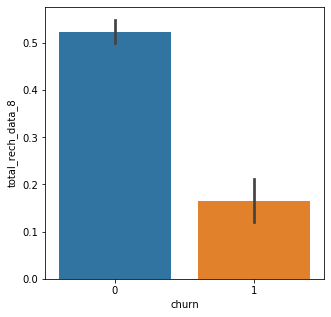

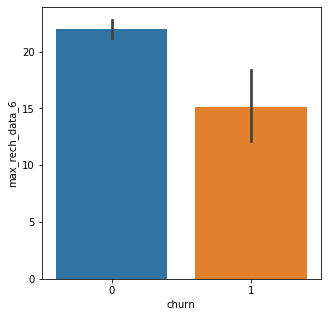

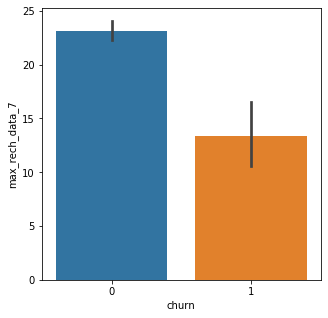

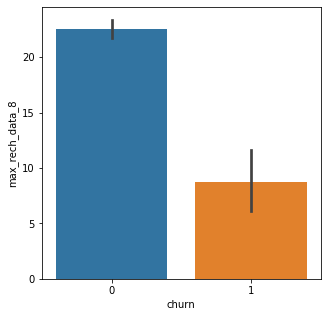

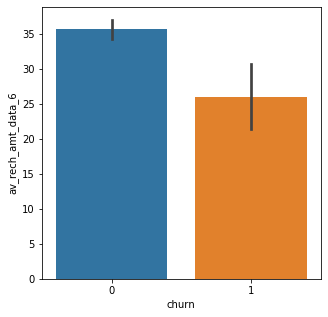

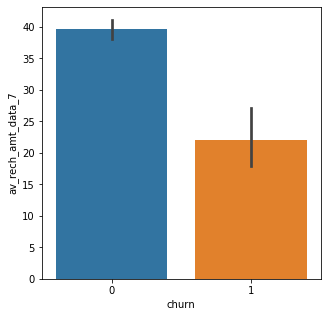

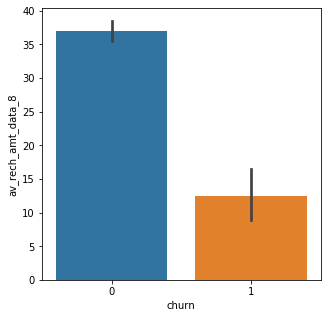

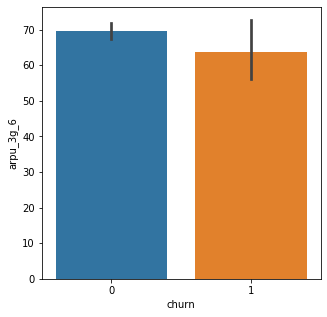

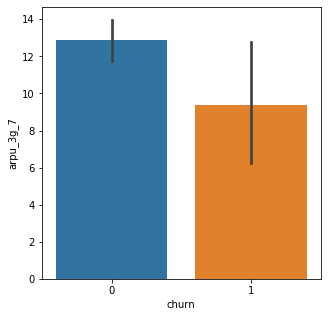

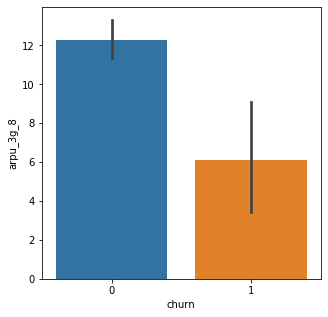

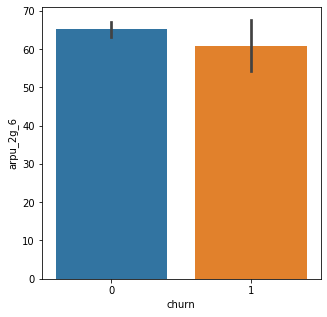

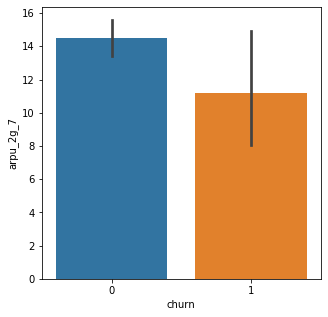

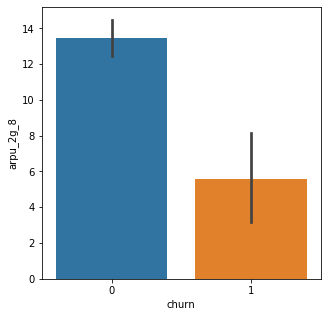

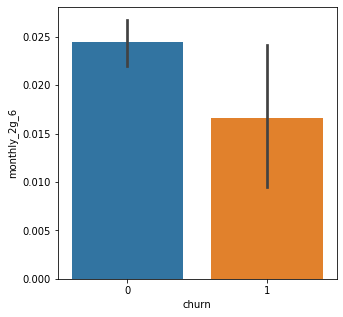

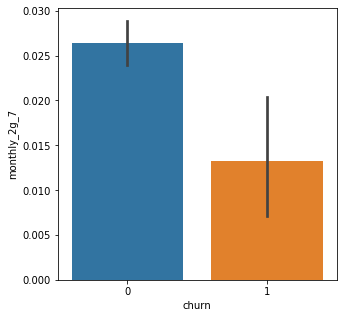

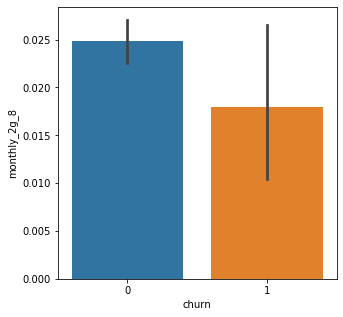

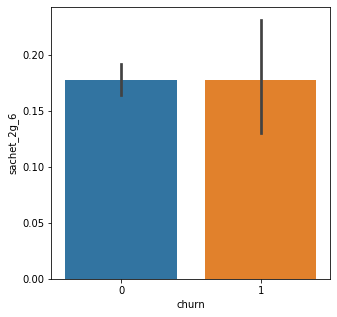

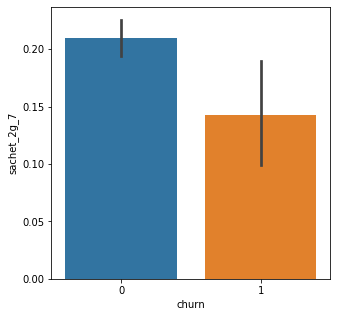

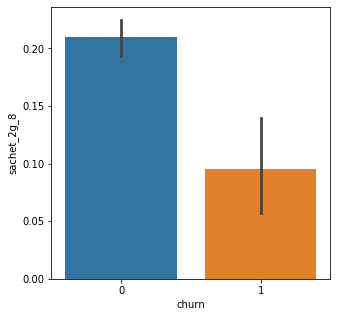

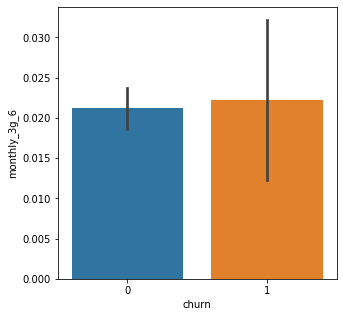

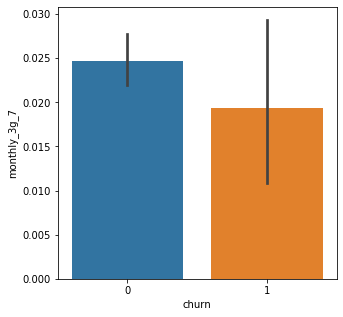

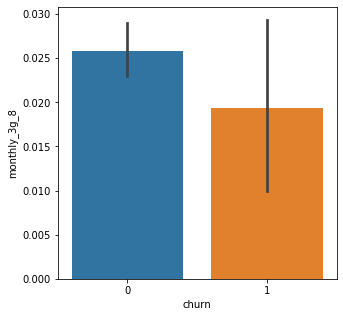

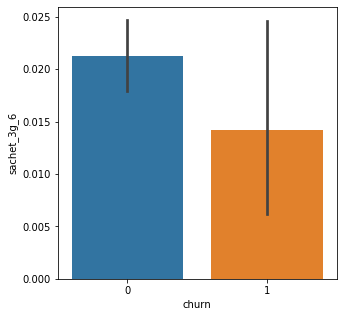

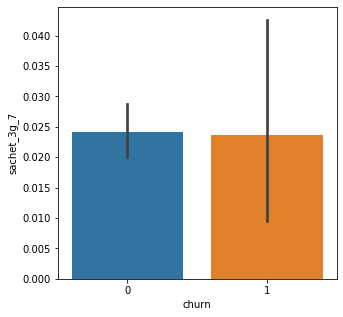

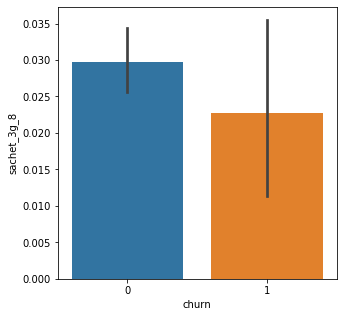

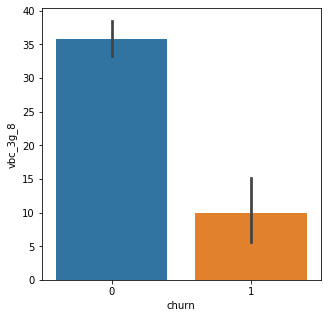

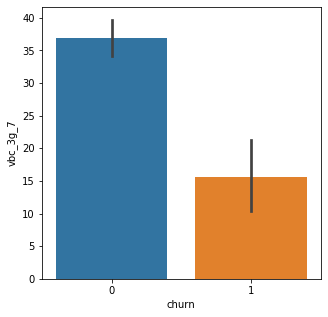

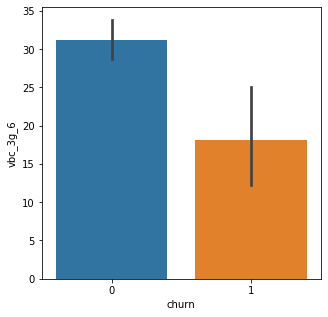

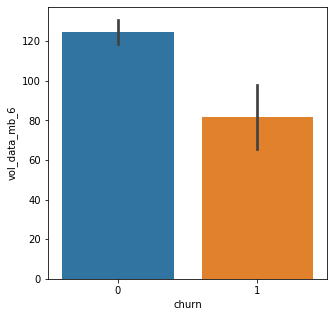

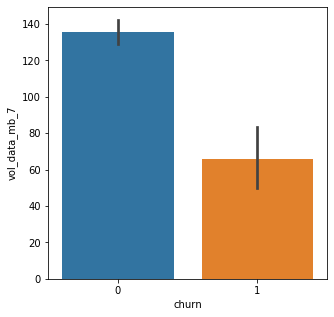

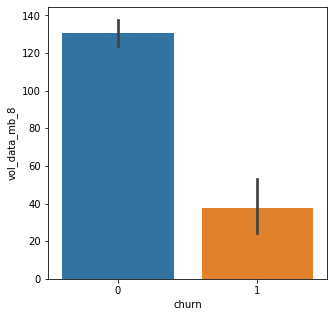

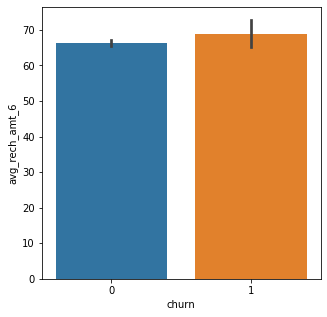

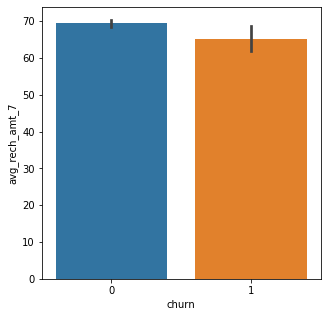

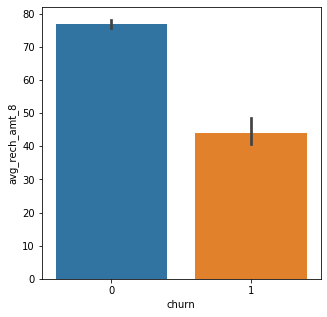

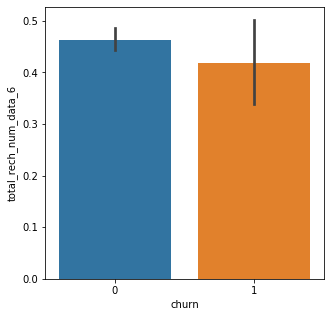

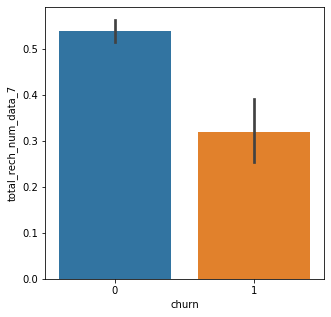

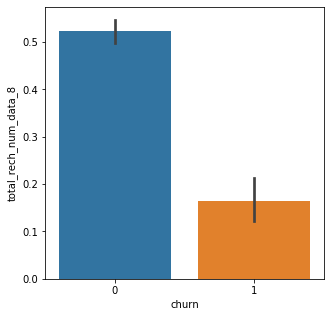

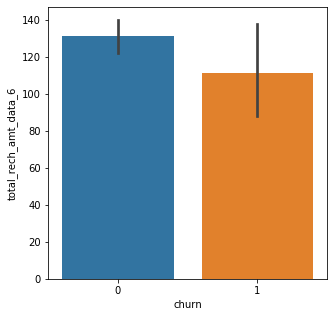

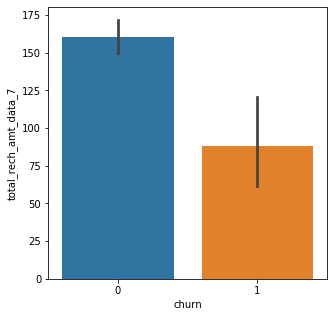

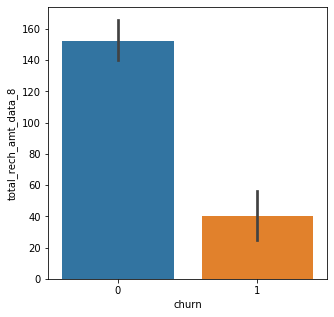

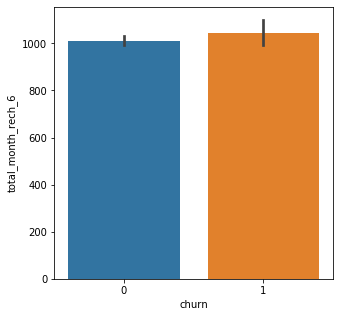

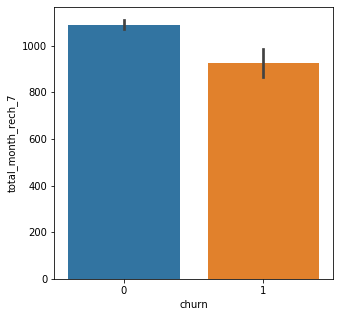

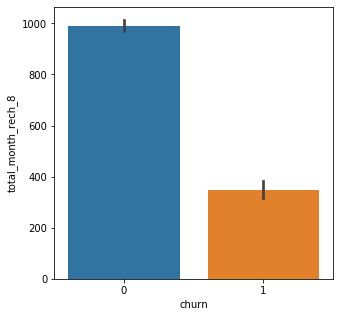

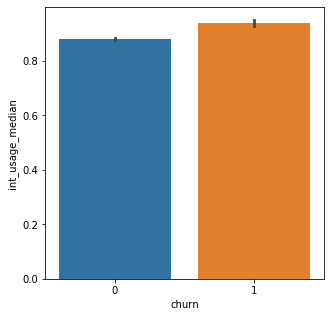

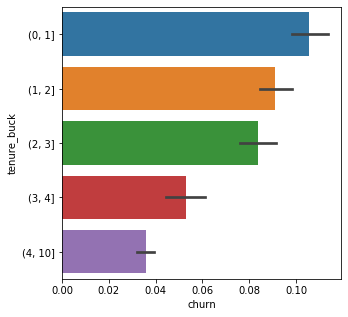

In [75]:
cont_cols = [col for col in high_val_cust.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize = (5, 5))
    sns.barplot(x = 'churn', y=col, data = high_val_cust)
    plt.show()

**The graphs above display the statistical relationship between "churn" and each of the other predictor variables.**

In [76]:
high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 149 entries, mobile_number to tenure_buck
dtypes: category(1), float64(117), int32(3), int64(28)
memory usage: 34.2 MB


In [77]:
# Let's create dummy variable for "tenure_buck"

high_val_cust = pd.get_dummies(high_val_cust, drop_first=True)
high_val_cust.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                  "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

### Model Building

In [78]:
# Creating copy of the final high_val_cust dataframe
df = high_val_cust.copy()

# Removing the columns not required for modeling
df.drop(['mobile_number'], axis=1, inplace=True)

In [79]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df.drop(['churn'], axis=1)

#putting response variables in Y
y = df['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [80]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20466, 150)
Number transactions y_train dataset:  (20466,)
Number transactions X_test dataset:  (8772, 150)
Number transactions y_test dataset:  (8772,)


In [81]:
# Prior to PCA, the features should be rescaled because PCA is scale-dependent.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
# Fitting and transforming the scaler on train

X_train = scaler.fit_transform(X_train)

# Transforming the train using the already fit scaler

X_test = scaler.transform(X_test)

### Handling Class Imbalance

In [83]:
print("Before handling the imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Before handling the imbalance, counts of label '0': {}".format(sum(y_train==0)))
print("Before handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before handling the imbalance, counts of label '1': 1483
Before handling the imbalance, counts of label '0': 18983
Before handling the imbalance, churn event rate : 7.25% 



**As we can see from above, there is a significant amount of data imbalance that has to be addressed before using PCA to create a better model.**

In [84]:
# SMOTE

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=12)
X_train_res, y_train_res = smt.fit_sample(X_train, y_train)

In [85]:
print('After handling the imbalance, the shape of train_X: {}'.format(X_train_res.shape))
print('After handling the imbalance, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After handling the imbalance, counts of label '1': {}".format(sum(y_train_res==1)))
print("After handling the imbalance, counts of label '0': {}".format(sum(y_train_res==0)))
print("After handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After handling the imbalance, the shape of train_X: (37966, 150)
After handling the imbalance, the shape of train_y: (37966,) 

After handling the imbalance, counts of label '1': 18983
After handling the imbalance, counts of label '0': 18983
After handling the imbalance, churn event rate : 50.0% 



In [86]:
# Improting the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [87]:
# Doing the PCA on the train data

pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [88]:
pca.explained_variance_ratio_[:50]

array([0.08319049, 0.07019978, 0.05433229, 0.03788041, 0.03017319,
       0.02908037, 0.02836475, 0.0257906 , 0.0237895 , 0.02208642,
       0.01821931, 0.01711764, 0.01666617, 0.01631476, 0.01561406,
       0.01398219, 0.01308341, 0.0129965 , 0.01273361, 0.01193329,
       0.011909  , 0.01165551, 0.01112488, 0.0105575 , 0.01022341,
       0.01009373, 0.00924117, 0.00903069, 0.00893546, 0.00853855,
       0.00847675, 0.00819509, 0.00797707, 0.00792498, 0.00788789,
       0.0074404 , 0.00726431, 0.00716456, 0.0071326 , 0.00699606,
       0.00698789, 0.00695251, 0.00683264, 0.0067736 , 0.00650669,
       0.00650108, 0.00643482, 0.00609557, 0.00601465, 0.00579154])

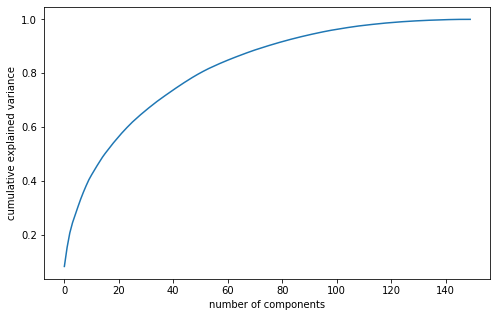

In [89]:
# Plotting the cumulative variance against the number of components while creating a screeplot

%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**As we can observe, 80 components can account for 90% of the variance.**

In [90]:
# On larger datasets, incremental PCA is quite effective and saves a huge amount of time.

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [91]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(37966, 80)

In [92]:
# Creating correlation matrix for the principal components

corrmat = np.corrcoef(X_train_pca.transpose())

# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.030100989713797453 , min corr:  -0.015885137158070103


**As can be seen, there is almost no link between the two components. Our data was successfully cleaned of multicollinearity, and as a result, our models will be significantly more reliable.**

In [93]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8772, 80)

### Let's apply **Logistic Regression** on our PCA components

In [94]:
# Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca, y_train_res)

In [95]:
# Making predictions on test data

pred_prob_test = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_prob_test))

'0.81'

In [96]:
# Making prediction on the test data

pred_test = model_pca.predict_proba(X_test_pca)
y_pred_default = model_pca.predict(X_test_pca)

In [97]:
# Importing classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [98]:
# print (classification_report(y_test,y_pred_default))

print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6077 2065]
 [ 162  468]]
0.7461240310077519


In [102]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [103]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8050305490246537


### Plotting ROC Curve

In [104]:
# ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

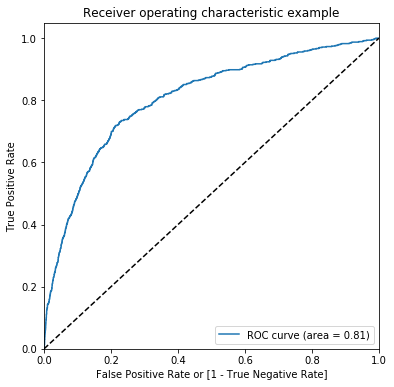

(array([0.00000000e+00, 1.22819946e-04, 1.22819946e-04, ...,
        9.99754360e-01, 9.99877180e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.0015873, ..., 1.       , 1.       ,
        1.       ]),
 array([1.99896440e+00, 9.98964401e-01, 9.97878174e-01, ...,
        1.48346049e-09, 1.71244221e-12, 4.44780396e-29]))

In [105]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [106]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.574030,1,1,1,1,1,1,0,0,0,0
1,0,0.061889,1,0,0,0,0,0,0,0,0,0
2,0,0.617262,1,1,1,1,1,1,1,0,0,0
3,0,0.093784,1,0,0,0,0,0,0,0,0,0
4,0,0.027460,1,0,0,0,0,0,0,0,0,0


**The accuracy, sensitivity, and specificity of various probability cutoffs will be calculated.**

In [108]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.071819  0.000000  1.000000
0.1   0.1  0.342681  0.296979  0.933333
0.2   0.2  0.476744  0.444117  0.898413
0.3   0.3  0.580255  0.558708  0.858730
0.4   0.4  0.669517  0.658806  0.807937
0.5   0.5  0.746124  0.746377  0.742857
0.6   0.6  0.816005  0.829157  0.646032
0.7   0.7  0.869357  0.897937  0.500000
0.8   0.8  0.904697  0.949275  0.328571
0.9   0.9  0.926357  0.986613  0.147619


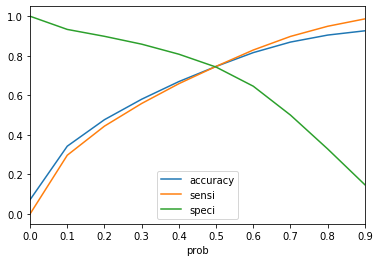

In [111]:
# Let's plot accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [112]:
# Finidng the optimal cutoff

import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [113]:
# Finding the optimal probability threshold

threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.4986893427649745]


In [114]:
# Create a new column called "predicted" with a value of 1 if Churn Prob > 0.49 else 0

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

0    8142
1     630
Name: churn, dtype: int64

In [115]:
# Confusion matrix 

confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6007, 2135],
       [ 157,  473]], dtype=int64)

**Metrics of the Logistic Regression Model on PCA**

In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# Positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7461240310077519
Sensitivity:  0.7507936507936508
Specificity:  0.7377794153770573
False postive rate:  0.2622205846229428
Positive predictive value:  0.18136503067484663
Negative predictive value:  0.9745295262816352
Misclassification Rate:  0.2612859097127223


### Let's now apply Random Forest on our PCA components

In [117]:
# Importing random forest classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_pca,y_train_res)

# Making predictions

y_pred_default = rfc.predict(X_test_pca)

In [119]:
confus_rf = confusion_matrix(y_test,y_pred_default)
confus_rf

array([[7618,  524],
       [ 458,  172]], dtype=int64)

In [120]:
TN = confus_rf[0,0] # true positive 
TP = confus_rf[1,1] # true negatives
FP = confus_rf[0,1] # false positives
FN = confus_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.273015873015873
Specificity:  0.9356423483173667
false postive rate:  0.06435765168263326
positive predictive value:  0.2471264367816092
Negative predictive value:  0.9432887568103021
Misclassification Rate:  0.11194710442316462


**Hyperparameter Tuning**

In [121]:
# GridSearchCV to find optimal n_estimators

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'max_depth': range(1, 21, 5)}

# Instantiate the model
rf_with_pca = RandomForestClassifier()

# Fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True )
rf_with_pca.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [122]:
# Scores of GridSearch CV

scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.480981,1.835927,0.063034,0.032858,1,{'max_depth': 1},0.699763,0.695681,0.699500,0.646602,...,0.688669,0.021124,4,0.712992,0.702884,0.698472,0.647626,0.703200,0.693035,0.023195
1,2.964725,0.189367,0.020945,0.006018,6,{'max_depth': 6},0.777719,0.787200,0.793258,0.791228,...,0.790839,0.008788,3,0.805479,0.809166,0.802581,0.803286,0.802561,0.804615,0.002513
2,4.728649,0.595304,0.054658,0.032489,11,{'max_depth': 11},0.881354,0.881617,0.873716,0.881454,...,0.881657,0.005201,2,0.931746,0.938496,0.931615,0.933693,0.932278,0.933566,0.002573
3,5.392287,0.776086,0.028325,0.006103,16,{'max_depth': 16},0.921385,0.916513,0.911772,0.922155,...,0.918822,0.004116,1,0.980344,0.979422,0.978829,0.981925,0.980279,0.980160,0.001047


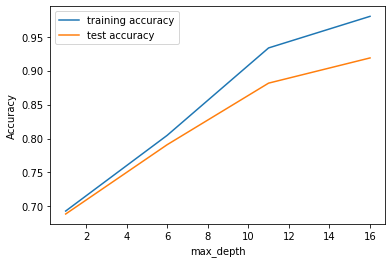

In [123]:
# Plotting accuracies with max_depth

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [124]:
# Tuning n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'n_estimators': range(50, 250, 50)}

# Instantiate the model
rf = RandomForestClassifier(max_depth=11)

# Fitting tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True )
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=11,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [125]:
# Scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.894181,1.192647,0.128857,0.016965,50,{'n_estimators': 50},0.898736,0.902818,0.894917,0.900158,...,0.900543,0.003767,4,0.945114,0.947419,0.944225,0.947817,0.948476,0.946610,0.001644
1,47.825036,1.142959,0.255919,0.018993,100,{'n_estimators': 100},0.903871,0.901633,0.899263,0.899368,...,0.902702,0.003742,3,0.948472,0.945970,0.947155,0.949595,0.947488,0.947736,0.001226
2,65.958416,1.593899,0.376599,0.008044,150,{'n_estimators': 150},0.903476,0.904267,0.896366,0.902529,...,0.903493,0.004607,2,0.947089,0.948077,0.947814,0.948081,0.947422,0.947697,0.000387
3,84.172377,7.110120,0.414299,0.104371,200,{'n_estimators': 200},0.903871,0.903345,0.900053,0.903319,...,0.904335,0.003639,1,0.948275,0.947452,0.946661,0.949661,0.949299,0.948269,0.001118


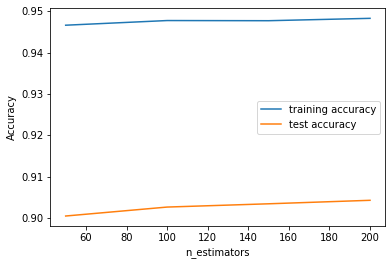

In [126]:
# Plotting accuracies with n_estimators

plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,  scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [128]:
# Scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.578342,0.143652,0.038299,0.009804,4,{'max_features': 4},0.852515,0.853700,0.845799,0.854847,...,0.853369,0.004563,4,0.900468,0.900566,0.887561,0.901528,0.898137,0.897652,0.005167
1,4.370174,0.116708,0.026529,0.004617,8,{'max_features': 8},0.865947,0.870819,0.862786,0.865780,...,0.868409,0.004885,3,0.910641,0.911102,0.910872,0.910252,0.913084,0.911190,0.000987
2,7.310359,0.368662,0.023738,0.001934,14,{'max_features': 14},0.874901,0.869766,0.868449,0.867887,...,0.871780,0.003936,2,0.920486,0.917753,0.915317,0.920788,0.916442,0.918157,0.002169
3,9.913239,1.158348,0.024139,0.003699,20,{'max_features': 20},0.870951,0.875823,0.872926,0.872234,...,0.875468,0.005219,1,0.921474,0.927038,0.924635,0.923323,0.923619,0.924018,0.001823


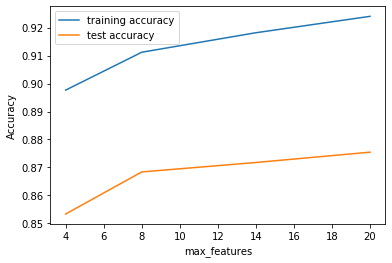

In [129]:
# Plotting accuracies with max_features

plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [130]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 250, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [131]:
# Scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.329488,0.099771,0.024934,0.002749,100,{'min_samples_leaf': 100},0.797077,0.798262,0.801686,0.809405,...,0.803719,0.006030,1,0.832872,0.820065,0.822600,0.827583,0.819978,0.824619,0.004965
1,3.755614,0.146200,0.035505,0.010451,150,{'min_samples_leaf': 150},0.780221,0.789571,0.798789,0.799526,...,0.794579,0.008692,2,0.806927,0.808277,0.809759,0.811780,0.808981,0.809145,0.001613
2,3.481740,0.335375,0.034910,0.009915,200,{'min_samples_leaf': 200},0.775217,0.784435,0.787464,0.791096,...,0.786309,0.006327,3,0.799980,0.798169,0.793362,0.801771,0.791664,0.796989,0.003866


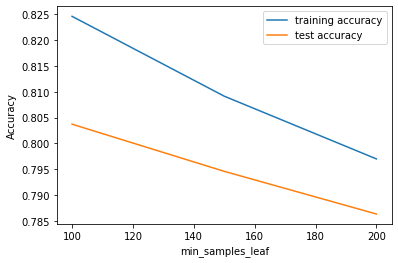

In [132]:
# Plotting accuracies with min_samples_leaf

plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [133]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(150, 350, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [134]:
# Scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.673312,0.082989,0.044881,0.006339,150,{'min_samples_split': 150},0.828944,0.842112,0.841849,0.844837,...,0.841595,0.007008,1,0.883314,0.884532,0.878935,0.886383,0.877593,0.882151,0.003348
1,5.406418,0.120206,0.028925,0.003090,200,{'min_samples_split': 200},0.818146,0.830524,0.830129,0.826396,...,0.829505,0.007806,2,0.867444,0.866094,0.860529,0.858662,0.863238,0.863193,0.003290
2,5.291128,0.212845,0.034909,0.004324,250,{'min_samples_split': 250},0.806426,0.817356,0.818146,0.821259,...,0.818943,0.008046,3,0.852693,0.849862,0.845549,0.844308,0.845559,0.847594,0.003171
3,5.113196,0.195471,0.028325,0.008019,300,{'min_samples_split': 300},0.800764,0.808533,0.812220,0.813356,...,0.811779,0.007543,4,0.836330,0.839655,0.837679,0.836044,0.834859,0.836913,0.001638


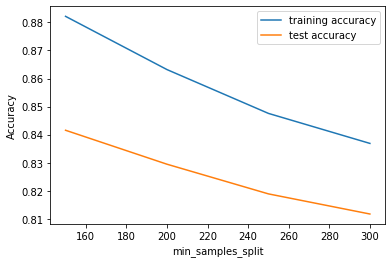

In [135]:
# Plotting accuracies with min_samples_split

plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [136]:
# Using the outcomes of the random search, creating the parameter grid :

param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 300, 100),
    'n_estimators': range(200, 300, 100), 
    'max_features': [8, 10]
}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,cv = 5, n_jobs=-1, verbose = 1,return_train_score=True )
grid_search.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [137]:
# Printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.818600853395143 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [138]:
# Selecting the model with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, max_depth=10,min_samples_leaf=100, min_samples_split=200, 
                             max_features=10, n_estimators=200)

In [139]:
# fit

rfc.fit(X_train_pca, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
# predict

y_pred_default = rfc.predict(X_test_pca)

In [141]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8142
           1       0.22      0.64      0.33       630

    accuracy                           0.81      8772
   macro avg       0.59      0.73      0.61      8772
weighted avg       0.91      0.81      0.85      8772

[[6711 1431]
 [ 229  401]]
accuracy_score:   0.8107615139078888


In [143]:
# Confusion Matrix

confus_rf_hyper=confusion_matrix(y_test,y_pred_default)
confus_rf_hyper

array([[6711, 1431],
       [ 229,  401]], dtype=int64)

**Statistical Metrics for Random Forest**

In [144]:
TN = confus_rf_hyper[0,0] # true positive 
TP = confus_rf_hyper[1,1] # true negatives
FP = confus_rf_hyper[0,1] # false positives
FN = confus_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

#Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8107615139078888
Sensitivity:  0.6365079365079365
Specificity:  0.8242446573323507
False postive rate:  0.17575534266764922
Positive predictive value:  0.21888646288209607
Negative predictive value:  0.9670028818443804
Misclassification Rate:  0.18923848609211127


### Conclusions on Model Selection

**By utilising PCA, we found that Logistic Regression is better than Decision Tree as per it's snesitivity and specificity score.**

#### LogisticRegression with PCA (rounding off to 2 decimals):
- Accuracy Score on test data:  0.75
- Sensitivity:  0.75
- Specificity:  0.74
- False postive rate:  0.26
- Positive predictive value:  0.18
- Negative predictive value:  0.98
- Misclassification Rate:  0.26

#### RandomForest with PCA (rounding off to 2 decimals):
- Accuracy Score:   0.81
- Sensitivity:  0.64
- Specificity:  0.82
- False postive rate:  0.18
- Positive predictive value:  0.22
- Negative predictive value:  0.97
- Misclassification Rate:  0.19

### **Hence, concluding that, the most effective model in this situation for forecasting customer attrition is Logistic Regression with PCA.**

**We will fit the Random Forest model we created above to the dataset we obtained after managing the data imbalance in.**

In [146]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

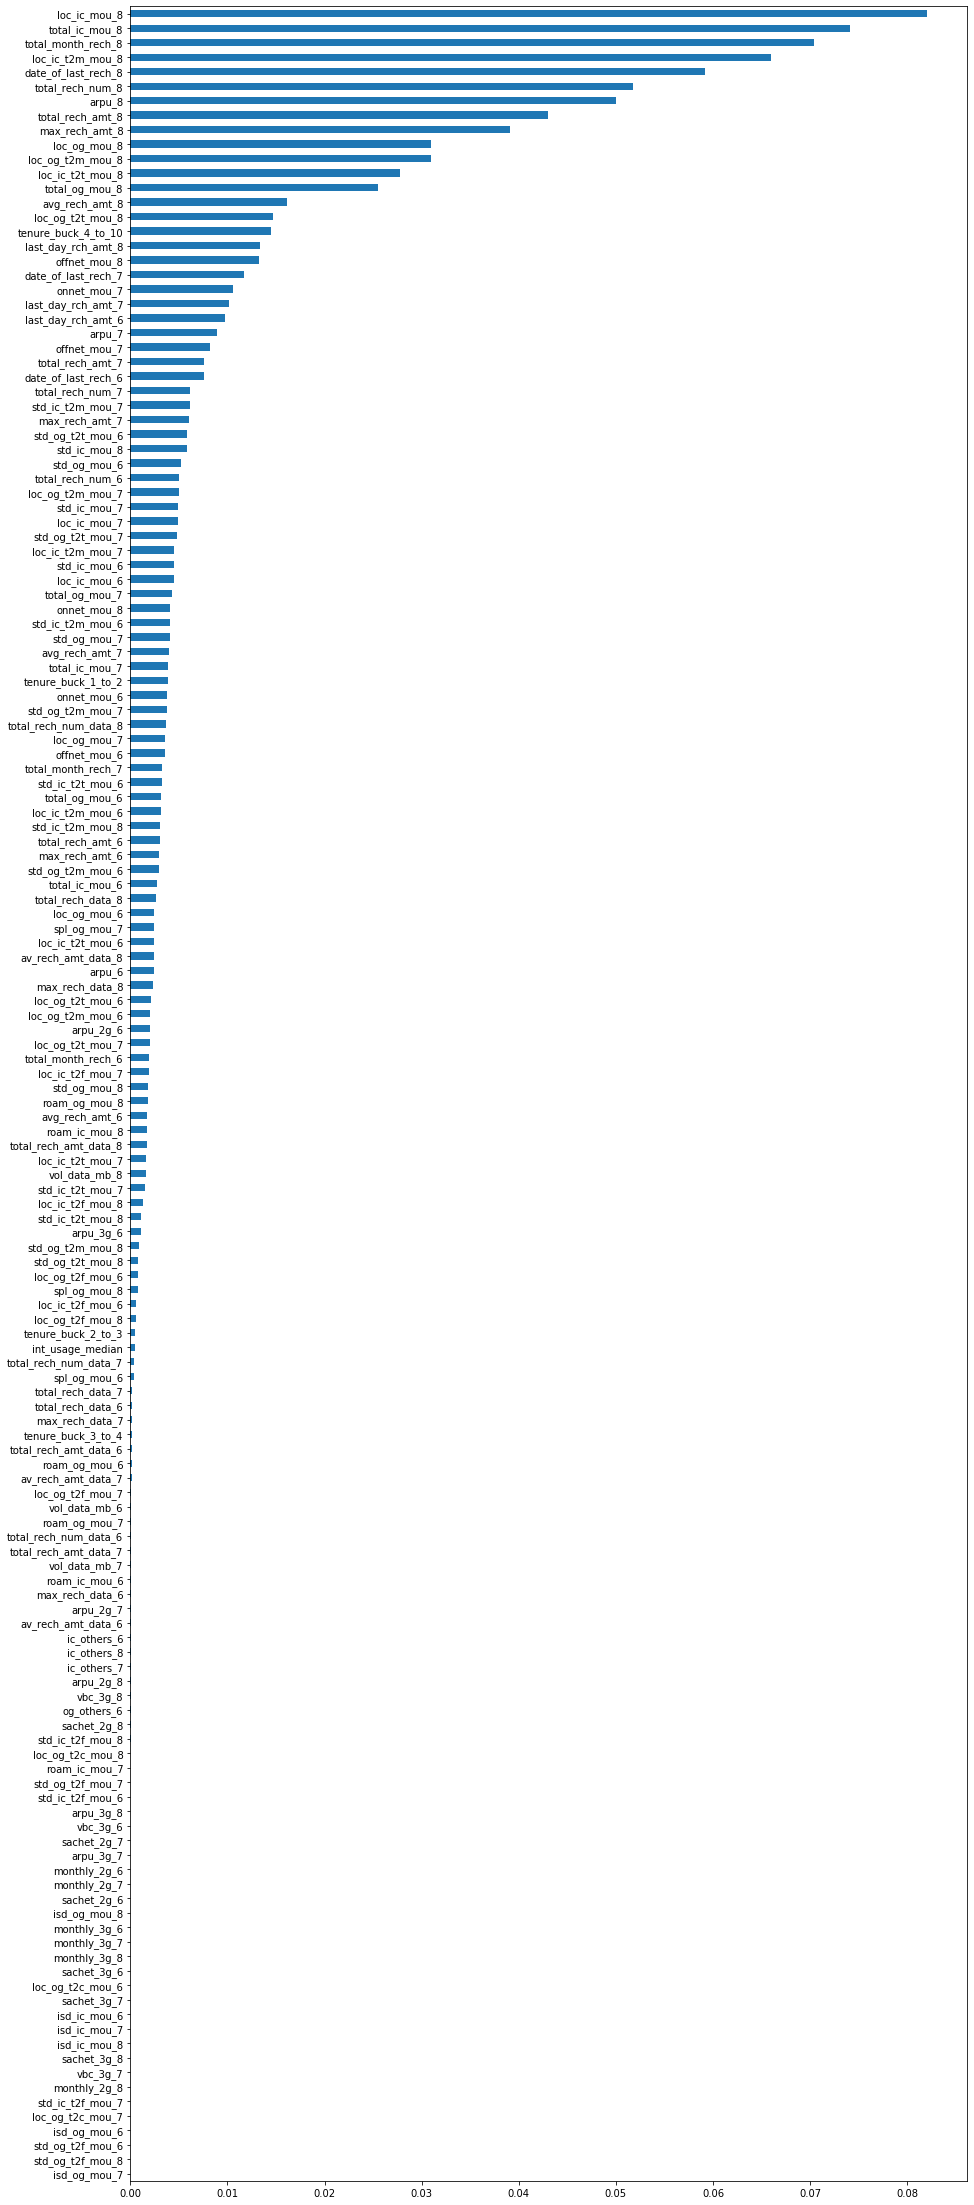

In [147]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

# Observation:

The graph above indicates that the top characteristics are those that are predominantly associated with month 8, or the action month, as determined by our RandomForest implementation.

Therefore, it is clear that the action phase's activities have a direct bearing on the loss of high-value clients. 




***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
3. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
4. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
5. Cutomers decreasing monthly 2g usage for August are most probable to churn.
6. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
7. Customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.